# Objective
- To extract keywords from the 2nd of May to the 12th of May 2020
- To plot 25 keywords with the most frequency

In [7]:
#packages we will need to achieve our objectives
import pandas as pd
import utils

In [8]:
#fetching our data
path = 'data/processed'
df = pd.read_csv(path+"/COVID19_ZM_transformedTweets.csv")
df.head(1)

,Unnamed: 0,Hashtags,Sentiment,SentimentClass,date,geo,id,retweets,text,username
0,0,NaN,-0.5,Negative,2020-05-13 07:07:33+00:00,NaN,1260466697661808642,0,Zambia May Not Get IMF Covid Loan Because It H...,ZambianObserver


In [10]:
#renaming the date column to created_at
df['created_at'] =  pd.to_datetime(df['date'])
#extracting the date from the created at column and making a date column
df['date'] =  pd.to_datetime(df['created_at']).dt.date
df.head(1)

,Unnamed: 0,Hashtags,Sentiment,SentimentClass,date,geo,id,retweets,text,username,created_at
0,0,NaN,-0.5,Negative,2020-05-13,NaN,1260466697661808642,0,Zambia May Not Get IMF Covid Loan Because It H...,ZambianObserver,2020-05-13


In [15]:
#Specifying dates for extracting tweets
start_date = "2020-05-02"
stop_date = "2020-05-12"

#Words we dont regard as keywords
meanless_words=['rt','na','ya','http','https','edgarclungu','tame','www','wa','amp','dr','com', \
                    'today','minister','covid_19','like','co','number','facebook','zambian','day','morocco', \
                    'covid-19','zambia','may','covid','coronavirus','country', \
                    'via','us','chng','cases','case','first','tot','total','countries',\
                    'two','amid','must','confirm','bit','confirmed','virus',\
                   'time','covid19','edgar','news','update','let','confirms','ly', \
                    'ministry','zimbabwe','corona','last','since', \
                   'botswana', 'burundi','need', 'central' ,'african','republic', 'cote','ivoire', \
                'eritrea','tests','ethiopia', 'kenya', 'malawi', 'mozambique', 'namibia', \
                    'rwanda','deaths','president','south' ,'town','africa','100th','eswatini', \
                    'recorded','uganda','24hrs','hours','one','done']

#getting tweets within a specific range
get_tweets=utils.get_tweet_for_specific_range(start_date,stop_date,df)

#Extracting only the text column from the tweets
tweet_txt=get_tweets["text"]

#Merging the entire text column so it becomes one corpus
merged_text_col=utils.merge_df_col_val(tweet_txt)

#Removing the RT username from the tweets
remove_RT_from_text=utils.remove_RT(merged_text_col)

#Removing all punctuation marks from the tweets
punct_rmvd_from_txt=utils.remove_punct_marks(merged_text_col)

#removing works that have no meaning such as is, as , the from the text
stp_wrds_rmvd_from_txt=utils.remove_stop_words(punct_rmvd_from_txt)

#Removing the words that have meaning but not considered keywords
meanless_wrds_rmvd_from_txt=utils.remove_meaninglesswords(stp_wrds_rmvd_from_txt,meanless_words)

#Removing numbers frm the text
rmv_numbers_from_txt=utils.remove_numeric(meanless_wrds_rmvd_from_txt)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

%matplotlib inline

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')

#create freq and dist plot
tweet_txt=rmv_numbers_from_txt
words=tweet_txt.split(" ")
nlp_words=nltk.FreqDist(words).most_common(25)

df_freq=pd.DataFrame(nlp_words, columns=['word', 'frequency'])
df_freq.head()

,word,frequency
0,new,339
1,tanzania,282
2,border,250
3,nakonde,113
4,health,99


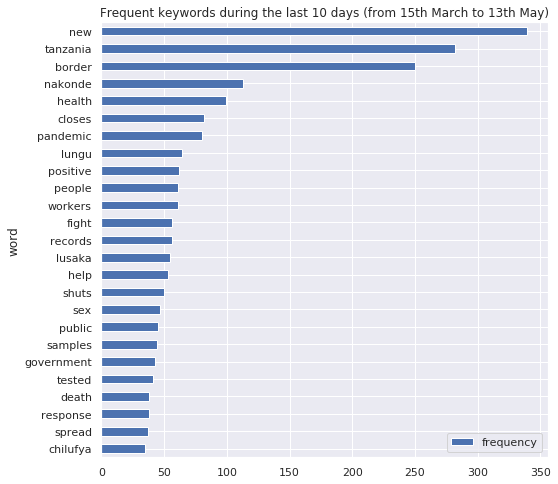

In [18]:
fig,ax=plt.subplots(figsize=(8,8))

df_freq.sort_values(by='frequency').plot.barh(x="word",y="frequency",ax=ax)
ax.set_title("Frequent keywords during the last 10 days (from 15th March to 13th May)")
plt.show()